# PROJECT 1 : SALES PREDICTION USING LINEAR REGRESSION

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


### CHECKING FOR LINEARITY

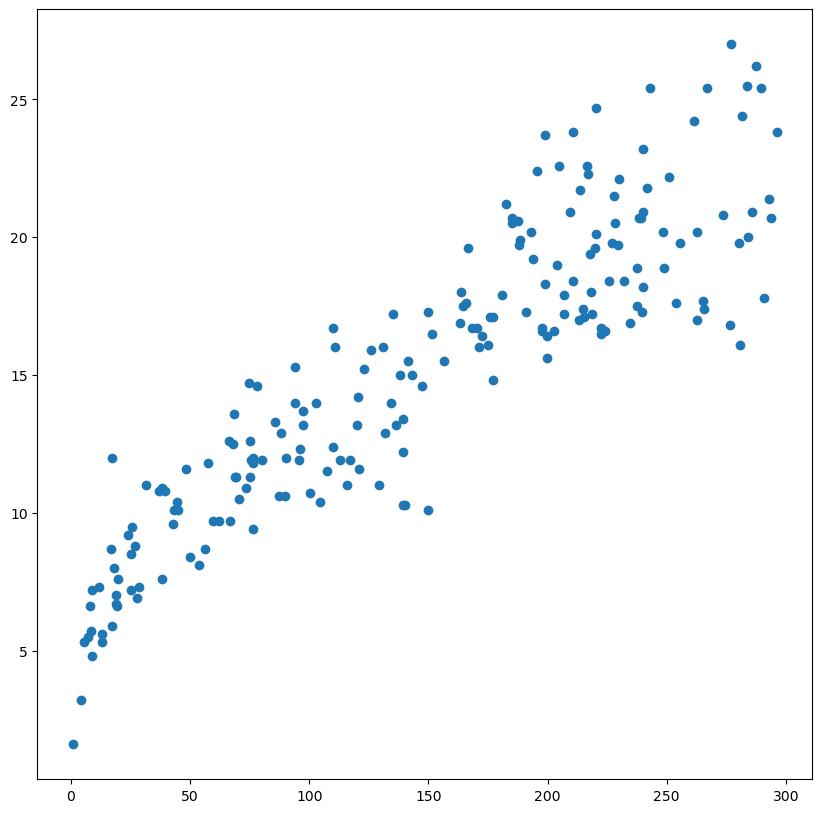

In [3]:
fig , ax = plt.subplots(figsize = (10,10))
ax.scatter(x = df["TV"] , y = df["Sales"])
plt.show()

## train test splitting of data

In [4]:
from sklearn.model_selection import train_test_split
X= df.drop("Sales" , axis = 1) 
y = df["Sales"]
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2)

In [12]:
y_train

56      5.5
143    10.4
44      8.5
121     7.0
181    17.2
       ... 
156    15.3
45     16.1
64     16.0
148    10.9
41     17.1
Name: Sales, Length: 160, dtype: float64

### APPLYING LINEAR REGRESSION

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train , y_train)

LinearRegression()

In [10]:
y_pred = lr.predict(X_test)
y_pred

array([12.7122843 , 13.12246222,  9.78375432, 21.10508917, 21.64293822,
       22.41875764, 15.26707624, 10.36391991, 15.43541408, 13.47598349,
       20.87556826, 23.76050093, 15.1662174 , 17.3780299 , 19.085736  ,
       17.20926977,  9.70790126, 20.82468936, 13.86948855, 20.26374843,
       21.3872643 ,  7.11895735, 14.76568462, 10.32826655, 19.67005387,
       12.57513574, 17.98881028, 18.79744789, 19.48495109,  9.81946462,
       16.92613872,  9.62374139, 17.30154631, 15.05543251, 13.73194711,
       20.83166405, 12.9767923 , 18.10030558,  6.3189991 , 11.18242245])

## CHECKING FOR THE ACCURACY OF MODEL USING R2 METRICS

In [13]:
from sklearn.metrics import r2_score,mean_absolute_error
mean_absolute_error(y_test , y_pred)

1.2383221586998183

In [14]:
r2_score(y_test , y_pred)

0.8851263016711922

## MAKING THE PREDICTIVE SYSTEM

In [15]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [47]:
df.iloc[13]

TV           97.5
Radio         7.6
Newspaper     7.2
Sales        13.7
Name: 13, dtype: float64

In [42]:
def predict_sales(tv_budget,radio_budget,newspaper_budget):
    features = np.array([[tv_budget,radio_budget,newspaper_budget]])
    results = lr.predict(features)
    return results

In [43]:
tv_budget = 199.1
radio_budget = 30.6
newspaper_budget = 38.7
sales = predict_sales(tv_budget,radio_budget,newspaper_budget)

C:\Users\Manit\OneDrive\Desktop\sample_project_Ml\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [44]:
sales

array([18.79744789])

## Pickle

In [46]:
import pickle
pickle.dump(lr,open('Project1_SalesPrediction.pkl' , 'wb'))